In [1]:
import os 
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import scipy.stats as stats

In [2]:
with open("../../../src/api_credentials.json") as f:
    aqs_creds = json.load(f)["aqs_credentials"]

aqs_email = aqs_creds["aqs_email"]
aqs_pw = aqs_creds["aqs_password"]

In [3]:
# function to pull data by lat/long box

def annual_aqs_by_box(aqs_email, aqs_pw, param_, bdate_, edate_, minlat_, maxlat_, minlon_, maxlon_):
    """
    Fetches data from the Air Quality System (AQS) API for a specified county.

    Parameters:
    - aqs_email (str): The email associated with the AQS API key
    - aqs_pw (str): The AQS API key
    - param_ (str): The AQS parameter code for the data selection. AQS uses proprietary 5 digit codes. They may be obtained via the list parameters service.
    - bdate_ (str): The beginning date in the format 'YYYYMMDD'
    - edate_ (str): The ending date in the format 'YYYYMMDD'
    - minlat_ (str): The minimum latitude coordinate for the box
    - maxlat_ (str): The maximum latitude coordinate for the box
    - minlon_ (str): The minimum longitude coordinate for the box
    - maxlon_ (str): The maximum longitude coordinate for the box

    Returns:
    dict: A dictionary containing the API response.
    """

    url = "https://aqs.epa.gov/data/api/annualData/byBox"

    params = {
        "email": aqs_email,
        "key": aqs_pw,
        "param": param_,
        "bdate": bdate_,
        "edate": edate_,
        "minlat": minlat_,
        "maxlat": maxlat_,
        "minlon": minlon_,
        "maxlon": maxlon_,
    }

    response = requests.get(url, params=params)

    data = response.json()

    return data

In [4]:
# top left corner of box
NWlat = 41.99
NWlng = -113.22

# bottom right corner of box
SElat = 39.77
SElng = -111.07

min_lat = str(SElat)
max_lat = str(NWlat)
min_lon = str(NWlng)
max_lon = str(SElng)

beginning_date = "20230101"
end_date = "20231231"

pm10_param = "85101"

In [5]:
slc_annual = annual_aqs_by_box(aqs_email=aqs_email,
                  aqs_pw=aqs_pw,
                  param_=pm10_param,
                  bdate_=beginning_date,
                  edate_=end_date,
                  minlat_=min_lat,
                  maxlat_=max_lat,
                  minlon_=min_lon,
                  maxlon_=max_lon)

In [6]:
slc_annual_df = pd.DataFrame(slc_annual['Data'])
slc_annual_df.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'metric_used', 'method',
       'year', 'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile'

In [7]:
slc_annual_df['year']

0    2023
1    2023
2    2023
3    2023
4    2023
Name: year, dtype: int64

In [8]:
# Can only pull one year at a time, so to look back to 1960...

def fetch_and_combine_data(aqs_email, aqs_pw, param, minlat, maxlat, minlon, maxlon):
    all_years_data = []  # List to store data of all years

    for year in range(1960, 2024):  # Loop through years from 1960 to 2023
        bdate_ = f'{year}0101'  # January 1st of the current year
        edate_ = f'{year}1231'  # December 31st of the current year
        
        # Call the API for the current year
        year_data = annual_aqs_by_box(aqs_email, aqs_pw, param, bdate_, edate_, minlat, maxlat, minlon, maxlon)
        
        # Assuming year_data['Data'] contains the relevant data
        if 'Data' in year_data:
            # Convert the data to a DataFrame
            df_year = pd.DataFrame(year_data['Data'])
            
            # Append the DataFrame to the list
            all_years_data.append(df_year)
    
    # Concatenate all DataFrames into one
    combined_df = pd.concat(all_years_data, ignore_index=True)
    
    return combined_df

In [9]:
slc_annual_1960_2023 = fetch_and_combine_data(aqs_email=aqs_email,
                  aqs_pw=aqs_pw,
                  param=pm10_param,
                  minlat=min_lat,
                  maxlat=max_lat,
                  minlon=min_lon,
                  maxlon=max_lon)

In [10]:
slc_annual_1960_2023.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'metric_used', 'method',
       'year', 'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile'

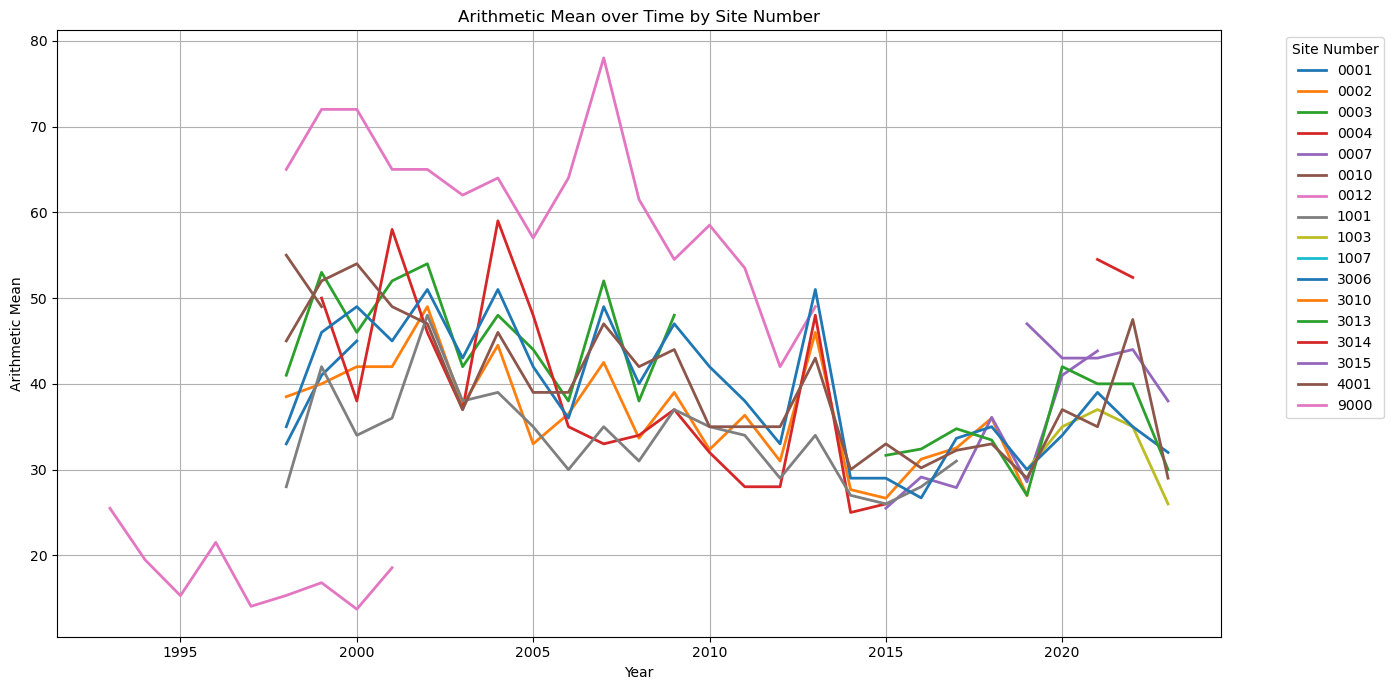

In [11]:
grouped = slc_annual_1960_2023.groupby(['site_number', 'year'])['ninetieth_percentile'].mean().reset_index()

# Pivot the DataFrame to have years as columns, which makes it easier to plot.
pivoted = grouped.pivot(index='year', columns='site_number', values='ninetieth_percentile')

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better readability

# Loop through each column (site_number) to plot
for column in pivoted.columns:
    plt.plot(pivoted.index, pivoted[column], marker='', linewidth=2, label=column)

plt.legend(title='Site Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Arithmetic Mean over Time by Site Number')
plt.xlabel('Year')
plt.ylabel('Arithmetic Mean')
plt.grid(True)

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()